In [1]:
import numpy as np
 
 
def py_intersect(string_1, string_2):
    """
    :param string_1: 字符串
    :param string_2: 字符串
    :return: 两字符串的交集
    """
    result = ''
    for char in string_1:
        if char in string_2 and char not in result:
            result += char
    return result
 
 
def dempster(mp1, mp2, P):
    """
    :param mp1: 证据源1，numpy数组，存储信度
    :param mp2: 证据源2，numpy数组，存储信度
    :param P: 辨识框架
    :return: 返回融合信度和冲突因子
    """
    l = len(P)  # 幂集长度，这里指恐怖分子数目
    mp = np.zeros((1, l), 'float64')  # 初始化最终结果mp
    k_matrix = np.zeros((l, l))  # 冲突因子乘子
    for k in range(l):
        tmp = P[k]
        f_matrix = np.zeros((l, l))  # 融合乘子
        for i in range(l):
            for j in range(l):
                tmp_ij = py_intersect(P[i], P[j])  # 有无交集
                if not tmp_ij:  # 若空集
                    k_matrix[i][j] = 1
                if tmp_ij == tmp:  # 若交集等于P[k]
                    f_matrix[i][j] = 1
        mp[0][k] = sum(sum(np.dot(mp1.T, mp2) * f_matrix))
    k = sum(sum(np.dot(mp1.T, mp2) * k_matrix))
    mp = mp / (1 - k)
    return mp, k
 


# Dempster’s method

In [2]:
m1 = np.array([[0.1, 0.02, 0.88,0]])
m2 = np.array([[0.85, 0.1, 0,0.05]])
 
P = ['A', 'B', 'C','BC']
 
m12, k = dempster(m1, m2, P)
print(f'融合后信度为{m12}')

融合后信度为[[0.64393939 0.02272727 0.33333333 0.        ]]


In [3]:
m12 = np.array([[0.64393939, 0.02272727, 0.33333333, 0.]])
m3 = np.array([[0.14, 0.13, 0.64,0.09]])
 
P = ['A', 'B', 'C','BC']
 
m123, k = dempster(m12, m3, P)
print(f'融合后信度为{m123}')

融合后信度为[[0.2663384  0.01477171 0.71888986 0.        ]]


In [4]:
m123 = np.array([[0.2663384,  0.01477171, 0.71888986, 0]])
m4 = np.array([[0.4, 0.52, 0.01,0.07]])
 
P = ['A', 'B', 'C','BC']
 
m1234, k = dempster(m123, m4, P)
print(f'融合后信度为{m1234}')

融合后信度为[[0.61666008 0.05044694 0.3328928  0.        ]]


In [5]:
m1234 = np.array([[0.61666008, 0.05044694, 0.3328928, 0]])
m5 = np.array([[0.25, 0.15, 0.4,0.2]])
 
P = ['A', 'B', 'C','BC']
 
m12345, k = dempster(m1234, m5, P)
print(f'融合后信度为{m12345}')

融合后信度为[[0.41491586 0.04752007 0.53756359 0.        ]]


# Standard deviation method

In [6]:
        list = []
        b = ['KNN', 'LR','DT', 'RF','SVC']
        len_sf = len(b)  
        d = np.zeros([len_sf,len_sf])
        a=np.array([[0.1,0.85,0.14,0.4,0.25],[0.02,0.1,0.13,0.52,0.15],[0.88,0,0.64,0.01,0.4],[0,0.05,0.09,0.07,0.2]])
        d=np.zeros(len_sf)
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=np.linalg.norm(p-c)
        print(d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(d[i])/sum(d)
        print('Crd:',crd,crd.shape)
        #print(w)
        A=np.zeros(4)
        for j in range(4):
            A[j] = sum(np.multiply(a[j,:],crd))
            # 加权平均证据WAE
    
        AA = A
        print('WAE:',AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','BC'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
      

[0.73130021 0.69641941 0.45188494 0.430581   0.18708287]
Crd: [0.29284005 0.27887247 0.18095169 0.17242079 0.074915  ] (5,)
WAE: [0.37935591 0.15816383 0.40519853 0.05728173]
融合后信度为[[0.3589387  0.10758763 0.5252898  0.00818387]]
融合后信度为[[0.33426315 0.06007869 0.60450736 0.00115079]]
融合后信度为[[3.01890552e-01 3.12490402e-02 6.66703471e-01 1.56937474e-04]]
融合后信度为[[2.66526308e-01 1.57259248e-02 7.17726846e-01 2.09211959e-05]]


# Deng et al.

In [7]:

        list = []
        predict_proba=a
        P = ['KNN', 'LR','DT', 'RF','SVM']
        len_sf = len(P)  
        m_between = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                m_between[i,j]=sum(np.multiply(predict_proba[:,i],predict_proba[:,j]))
                # m_between两个证据的内积=两个证据中，每个出现事件的概率乘积*（出现事件的交集/并集）
                # 对单个事件而不是集合事件而言，等同于对应事件的概率乘积之和
        print(m_between)
        d = np.zeros([len_sf,len_sf])
        sim = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                d[i,j]=np.sqrt(0.5*(m_between[i,i]+m_between[j,j]-2*m_between[i,j]))
                # d为两个证据间的距离，距离越小表示两个证据提出的意见越一致
                sim[i,j]=1-d[i,j]
                # sim为两个证据之间的相似度，越大代表两个证据之间的一致性越强
        print('D:',d)
        print('S:',sim)
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=sum(sim[i,:])-sim[i,i]
            # sup为对每个证据的支持度，为两个证据之间的相似度之和减去该证据自己对自己的支持度
            # 证据对自己的支持度为1
        print('支持度:',sup)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(sup[i])/sum(sup)
            # crd为证据的可信度
            # 即为归一化的支持度，其他证据对该证据支持度越高，则可信度越高
        print('Crd:',crd)
        A = np.zeros(4)
        for i in range(4):
            A[i] = sum(np.multiply(predict_proba[i,:],crd))
            # 将可信度作为源权重，估计所有情况下数据出现的概率
        AA = A
        print('加权平均证据:',AA)
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','BC'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {1-k}')

[[0.7848 0.087  0.5798 0.0592 0.38  ]
 [0.087  0.735  0.1365 0.3955 0.2375]
 [0.5798 0.1365 0.4542 0.1363 0.3285]
 [0.0592 0.3955 0.1363 0.4354 0.196 ]
 [0.38   0.2375 0.3285 0.196  0.285 ]]
D: [[0.         0.82030482 0.19924859 0.74222638 0.39357337]
 [0.82030482 0.         0.67683085 0.43554563 0.52201533]
 [0.19924859 0.67683085 0.         0.55542776 0.20273135]
 [0.74222638 0.43554563 0.55542776 0.         0.40521599]
 [0.39357337 0.52201533 0.20273135 0.40521599 0.        ]]
S: [[1.         0.17969518 0.80075141 0.25777362 0.60642663]
 [0.17969518 1.         0.32316915 0.56445437 0.47798467]
 [0.80075141 0.32316915 1.         0.44457224 0.79726865]
 [0.25777362 0.56445437 0.44457224 1.         0.59478401]
 [0.60642663 0.47798467 0.79726865 0.59478401 1.        ]]
支持度: [1.84464684 1.54530337 2.36576145 1.86158423 2.47646396]
Crd: [0.18275121 0.15309492 0.23437861 0.18442922 0.24534604]
加权平均证据: [0.31632701 0.18213883 0.41080609 0.09072807]
融合后信度为[[0.23948543 0.15849917 0.58231432 0.

In [8]:
        a=np.array([[0.1,0.85,0.14,0.4,0.25],[0.02,0.1,0.13,0.52,0.15],[0.88,0,0.64,0.01,0.4],[0,0.05,0.09,0.07,0.2]])
        w = np.array([1, 1, 1, 2])
        IV = np.zeros(1)

        #IV=np.exp(-((a[0]*np.log2(a[0]))+(a[1]*np.log2(a[1]))+(a[3]*np.log2(a[3]/3))))
        IV0=np.exp(-((a[:,0][0]*np.log2(a[:,0][0]))+(a[:,0][1]*np.log2(a[:,0][1]))+(a[:,0][2]*np.log2(a[:,0][2]))))
        IV1=np.exp(-((a[:,1][1]*np.log2(a[:,1][1]))+(a[:,1][0]*np.log2(a[:,1][0]))+(a[:,1][3]*np.log2(a[:,1][3]/3))))
        IV2=np.exp(-((a[:,2][0]*np.log2(a[:,2][0]))+(a[:,2][1]*np.log2(a[:,2][1]))+(a[:,2][2]*np.log2(a[:,2][2]))+(a[:,2][3]*np.log2(a[:,2][3]/3))))
        IV3=np.exp(-((a[:,3][0]*np.log2(a[:,3][0]))+(a[:,3][1]*np.log2(a[:,3][1]))+(a[:,3][2]*np.log2(a[:,3][2]))+(a[:,3][3]*np.log2(a[:,3][3]/3))))
        IV4=np.exp(-((a[:,4][0]*np.log2(a[:,4][0]))+(a[:,4][1]*np.log2(a[:,4][1]))+(a[:,4][2]*np.log2(a[:,4][2]))+(a[:,4][3]*np.log2(a[:,4][3]/3))))
        
        print(IV0,IV1,IV2,IV3,IV4)

1.835585594903989 2.286066842446812 5.192019381053731 4.328793340347491 9.213724779054376


In [9]:
IV=IV0,IV1,IV2,IV3,IV4
print(IV)

(1.835585594903989, 2.286066842446812, 5.192019381053731, 4.328793340347491, 9.213724779054376)


# Xiao’s method

In [13]:
        import math
        import scipy.stats
        a[a<0.00003] = 1e-12
        list = []
        P = ['KNN', 'LR', 'RF', 'DT','SVM']
        len_sf = len(P) 
        BJSS= np.zeros(len_sf) 
        #print(a)
        BJS = np.zeros([len_sf,len_sf])
        M=np.zeros([4,5])
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        print(BJS)
        for i in range(len_sf):
            BJSS[i]=sum(BJS[i,:])/4
        print('S:',BJSS)
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=1/BJSS[i]
        # 证据对自己的支持度为1
        print('sup:',sup)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(sup[i])/sum(sup)
            # crd为证据的可信度
            # 即为归一化的支持度，其他证据对该证据支持度越高，则可信度越高
       #测量证据的信息量
        #print(e)
        #归一化
        IVV = np.zeros(len_sf)
        for i in range(len_sf):
            IVV[i]=float(IV[i])/sum(IV)
        Acrd = np.zeros(len_sf)
        Acrd = np.multiply(crd,IVV)
        #归一化
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A = np.zeros(4)
        for i in range(4):
            A[i] = sum(np.multiply(a[i,:],Acrdd))
            #将可信度作为源权重，估计所有情况下数据出现的概率
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','BC'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        

[[0.         0.73040479 0.09365254 0.71826121 0.23107188]
 [0.73040479 0.         0.52956981 0.17837934 0.36311549]
 [0.09365254 0.52956981 0.         0.42608872 0.04744828]
 [0.71826121 0.17837934 0.42608872 0.         0.28521722]
 [0.23107188 0.36311549 0.04744828 0.28521722 0.        ]]
S: [0.44334761 0.45036736 0.27418984 0.40198662 0.23171322]
sup: [2.25556648 2.22040958 3.64710821 2.48764497 4.31567953]
[0.27487021 0.18575805 0.40383591 0.13553583]
融合后信度为[[0.16740023 0.1880194  0.603879   0.04070136]]
融合后信度为[[0.09967107 0.14723235 0.74114711 0.01194947]]
融合后信度为[[0.05670765 0.10250982 0.8374302  0.00335234]]
融合后信度为[[0.03101074 0.06676447 0.90132083 0.00090395]]


# Zhu et al.

In [12]:
        list = []
        b = ['KNN', 'LR','DT', 'RF','SVC']
        len_sf = len(b)  
        d = np.zeros([len_sf,len_sf])
        a=predict_proba
        for i in range(5):
            for j in range(5):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                d[i,j]=1/np.sqrt(2)*np.sqrt(((np.sqrt(p[0])-np.sqrt(q[0]))**2+(np.sqrt(p[1])-np.sqrt(q[1]))**2+(np.sqrt(p[2])-np.sqrt(q[2]))**2+(np.sqrt(p[3])-np.sqrt(q[3]))**2/3))
        print('D:',d)
        dd= np.zeros(len_sf) 
        for i in range(len_sf):
            dd[i]=sum((d[i,:])-d[i,i])/4
       
        sup = np.zeros(len_sf)
        for i in range(len_sf):
            sup[i]=1/dd[i]
            # sup为对每个证据的支持度，为两个证据之间的相似度之和减去该证据自己对自己的支持度
            # 证据对自己的支持度为1

        crd = np.zeros(len_sf)
        crd = np.multiply(sup,IV)
        #归一化
        Acrd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrd[i]=float(crd[i])/sum(crd)
        
        
        A = np.zeros(4)
        for i in range(4):
            A[i] = sum(np.multiply(a[i,:],Acrd))
            #将可信度作为源权重，估计所有情况下数据出现的概率
        
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','BC'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
        

D: [[0.         0.80440249 0.22410174 0.76215344 0.35658262]
 [0.80440249 0.         0.68701568 0.35937357 0.54761391]
 [0.22410174 0.68701568 0.         0.586145   0.16100397]
 [0.76215344 0.35937357 0.586145   0.         0.4602188 ]
 [0.35658262 0.54761391 0.16100397 0.4602188  0.        ]]
[0.28073196 0.18987371 0.40013585 0.12925848]
融合后信度为[[0.1774185  0.19166226 0.59330664 0.03761259]]
融合后信度为[[0.11016348 0.15108232 0.72800096 0.01075324]]
融合后信度为[[0.06548381 0.10641452 0.82515859 0.00294308]]
融合后信度为[[3.74182596e-02 7.02615004e-02 8.91545922e-01 7.74318345e-04]]


# Proposed method

In [11]:
        list = []
        import scipy.stats
        b = ['KNN', 'LR','DT', 'RF','SVM']
        len_sf = len(b)  
        
        a=predict_proba
        d=np.zeros(5)
        for i in range(5):
            p=a[:,i]
            c = np.mean(p) 
            d[i]=np.sqrt(((np.sqrt(p[0])-np.sqrt(c))**2+(np.sqrt(p[1])-np.sqrt(c))**2+(np.sqrt(p[2])-np.sqrt(c))**2+(np.sqrt(p[3])-np.sqrt(c))**2/3))
        print(d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(1/d[i])/sum(1/d)
            # crd为证据的可信度
        BJS = np.zeros([len_sf,len_sf])
        a[a<0.00003] = 1e-12
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        #print(BJS)
        BJSS= np.zeros(len_sf) 
        for i in range(len_sf):
            BJSS[i]=sum((BJS[i,:])-BJS[i,i])/4
        sup1 = np.zeros(len_sf)
        for i in range(len_sf):
            sup1[i]=1/BJSS[i]
        crd1 = np.zeros(len_sf)
        for i in range(len_sf):
            crd1[i]=float(sup1[i])/sum(sup1)
        
        Acrd = np.zeros(len_sf)
       
        Acrd = np.multiply(crd,crd1)
        print(Acrd)
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A=np.zeros(4)
        for j in range(4):
            A[j] = sum(np.multiply(a[j,:],Acrdd))
            # 加权平均证据WAE
    
        AA = A
        print(AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        #print(m1,m2)
        P = ['A', 'B', 'C','BC'] 
        mp, k = dempster(m1, m2, P)
        print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        print(f'融合后信度为{mp2}')
        #print(f'冲突因子k = {k}')
        mp3, k = dempster(mp2, m2, P)
        print(f'融合后信度为{mp3}')
        #print(f'冲突因子k = {k}')
          

[0.66151422 0.69805601 0.37230695 0.49488299 0.17656425]
[0.01715676 0.01600522 0.04929086 0.02529326 0.12298872]
[0.27341048 0.17315233 0.41646302 0.13697417]
融合后信度为[[0.16305212 0.16886117 0.62716314 0.04092357]]
融合后信度为[[0.09409494 0.12548972 0.76858393 0.01183142]]
融合后信度为[[0.05159717 0.08216209 0.86299047 0.00325027]]
融合后信度为[[2.71521931e-02 5.01258917e-02 9.21865030e-01 8.56884954e-04]]


In [2]:
w1=np.array([[0.64393939, 0.02272727, 0.33333333, 0],[0.2663384,  0.01477171, 0.71888986, 0],[0.61666008, 0.05044694, 0.3328928,  0],[0.41491586, 0.04752007, 0.53756359, 0]])
w2=np.array([[0.3589387,0.10758763,0.5252898,0.00818387],[0.33426315,0.06007869,0.60450736,0.00115079],[3.01890552e-01,3.12490402e-02,6.66703471e-01,1.56937474e-04],[2.66526308e-01,1.57259248e-02,7.17726846e-01,2.09211959e-05]])

w3=np.array([[0.23948543, 0.15849917, 0.58231432, 0.01970108],[0.17844838, 0.11032934, 0.70701182, 0.00421045],[0.12712881, 0.06952828, 0.80248258, 0.00086033],[8.69974025e-02, 4.13819272e-02, 8.71451808e-01, 1.68862565e-04]])

w4=np.array([[0.16740023, 0.1880194 , 0.603879,   0.04070136],[0.09967107, 0.14723235, 0.7411471, 0.01194947],
[0.05670765, 0.10250982, 0.8374302,  0.00335234],[0.03101074, 0.06676447, 0.90132083, 0.00090395]])
w5=np.array([[0.1774185,  0.19166226, 0.59330664, 0.03761259],[0.11016348, 0.15108232, 0.72800096, 0.01075324],[0.06548381, 0.10641452,0.82515859, 0.00294308],[3.74182596e-02, 7.02615004e-02, 8.91545922e-01, 7.74318345e-04]])
w6=np.array([[0.16305212, 0.16886117, 0.62716314, 0.04092357],[0.09409494, 0.12548972, 0.76858393, 0.01183142],[0.05159717, 0.08216209, 0.86299047, 0.00325027],
[2.71521931e-02, 5.01258917e-02, 9.21865030e-01, 8.56884954e-04]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


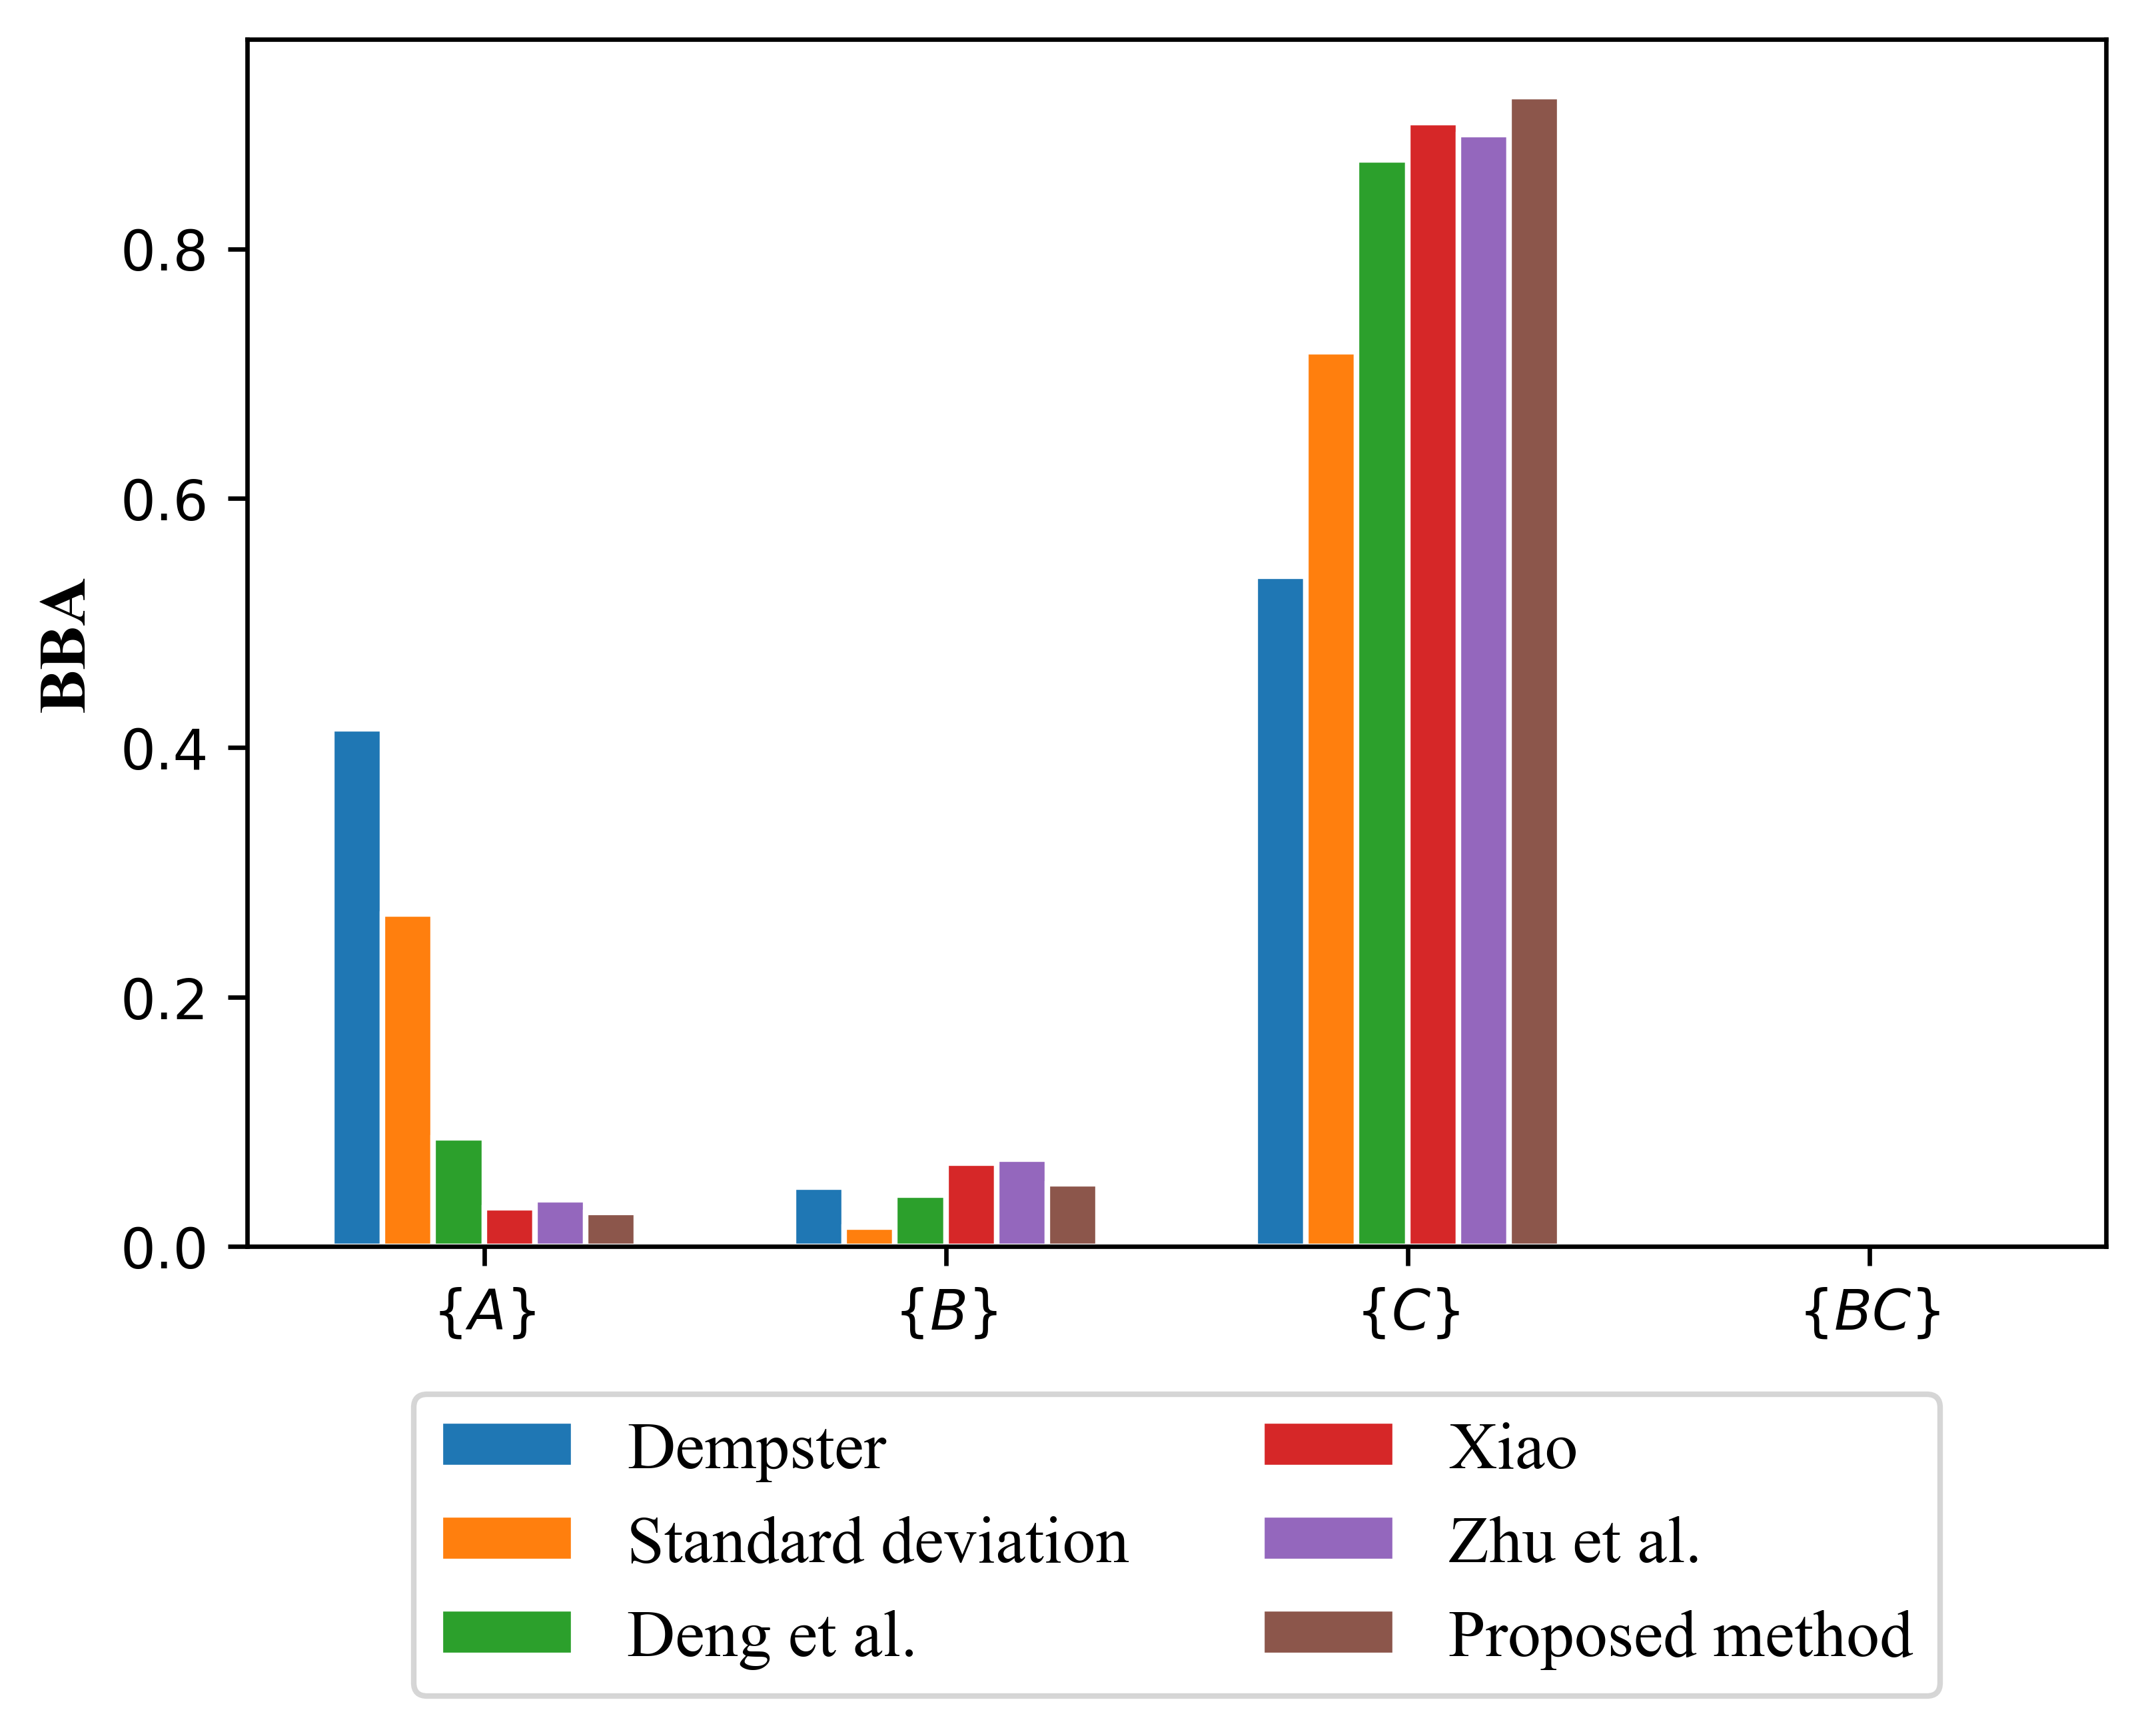

In [7]:
from matplotlib import pyplot as plt
plt.figure(dpi=600)
barWidth = 0.11
# 设置柱子的高度
bars1=w1[3,:]

bars2=w2[3,:]
bars3=w3[3,:]
bars4=w4[3,:]
bars5=w5[3,:]
bars6=w6[3,:]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
# 创建柱子
plt.bar(r1, bars1, width=barWidth, edgecolor='white',label='Dempster')
plt.bar(r2, bars2, width=barWidth, edgecolor='white',label='Standard deviation')
plt.bar(r3, bars3, width=barWidth, edgecolor='white',label='Deng et al.')
plt.bar(r4, bars4, width=barWidth, edgecolor='white',label='Xiao')
plt.bar(r5, bars5, width=barWidth, edgecolor='white',label='Zhu et al.')
plt.bar(r6, bars6, width=barWidth, edgecolor='white',label='Proposed method')
plt.ylabel('BBA',fontproperties="Times New Roman",fontsize=12,fontweight='bold') 
# 添加x轴名称
plt.xticks([r + barWidth for r in range(len(bars1))], ['{$A$}','{$B$}','{$C$}','{$BC$}'])
# 创建图例
font = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        
#         ,'color':'red'
        ,'size':12
       }


#ax.set_xticklabels(labels,fontproperties='Times New Roman') 
#plt.yticks(fontproperties='Times New Roman')#设
plt.xticks(x+2.5*barWidth, labels=labels)
plt.legend(bbox_to_anchor=(0.5, -0.4),loc=8,ncol=2,prop = font)

plt.savefig("Fig.3(a).eps",bbox_inches = 'tight')
# 展示图片
plt.show()


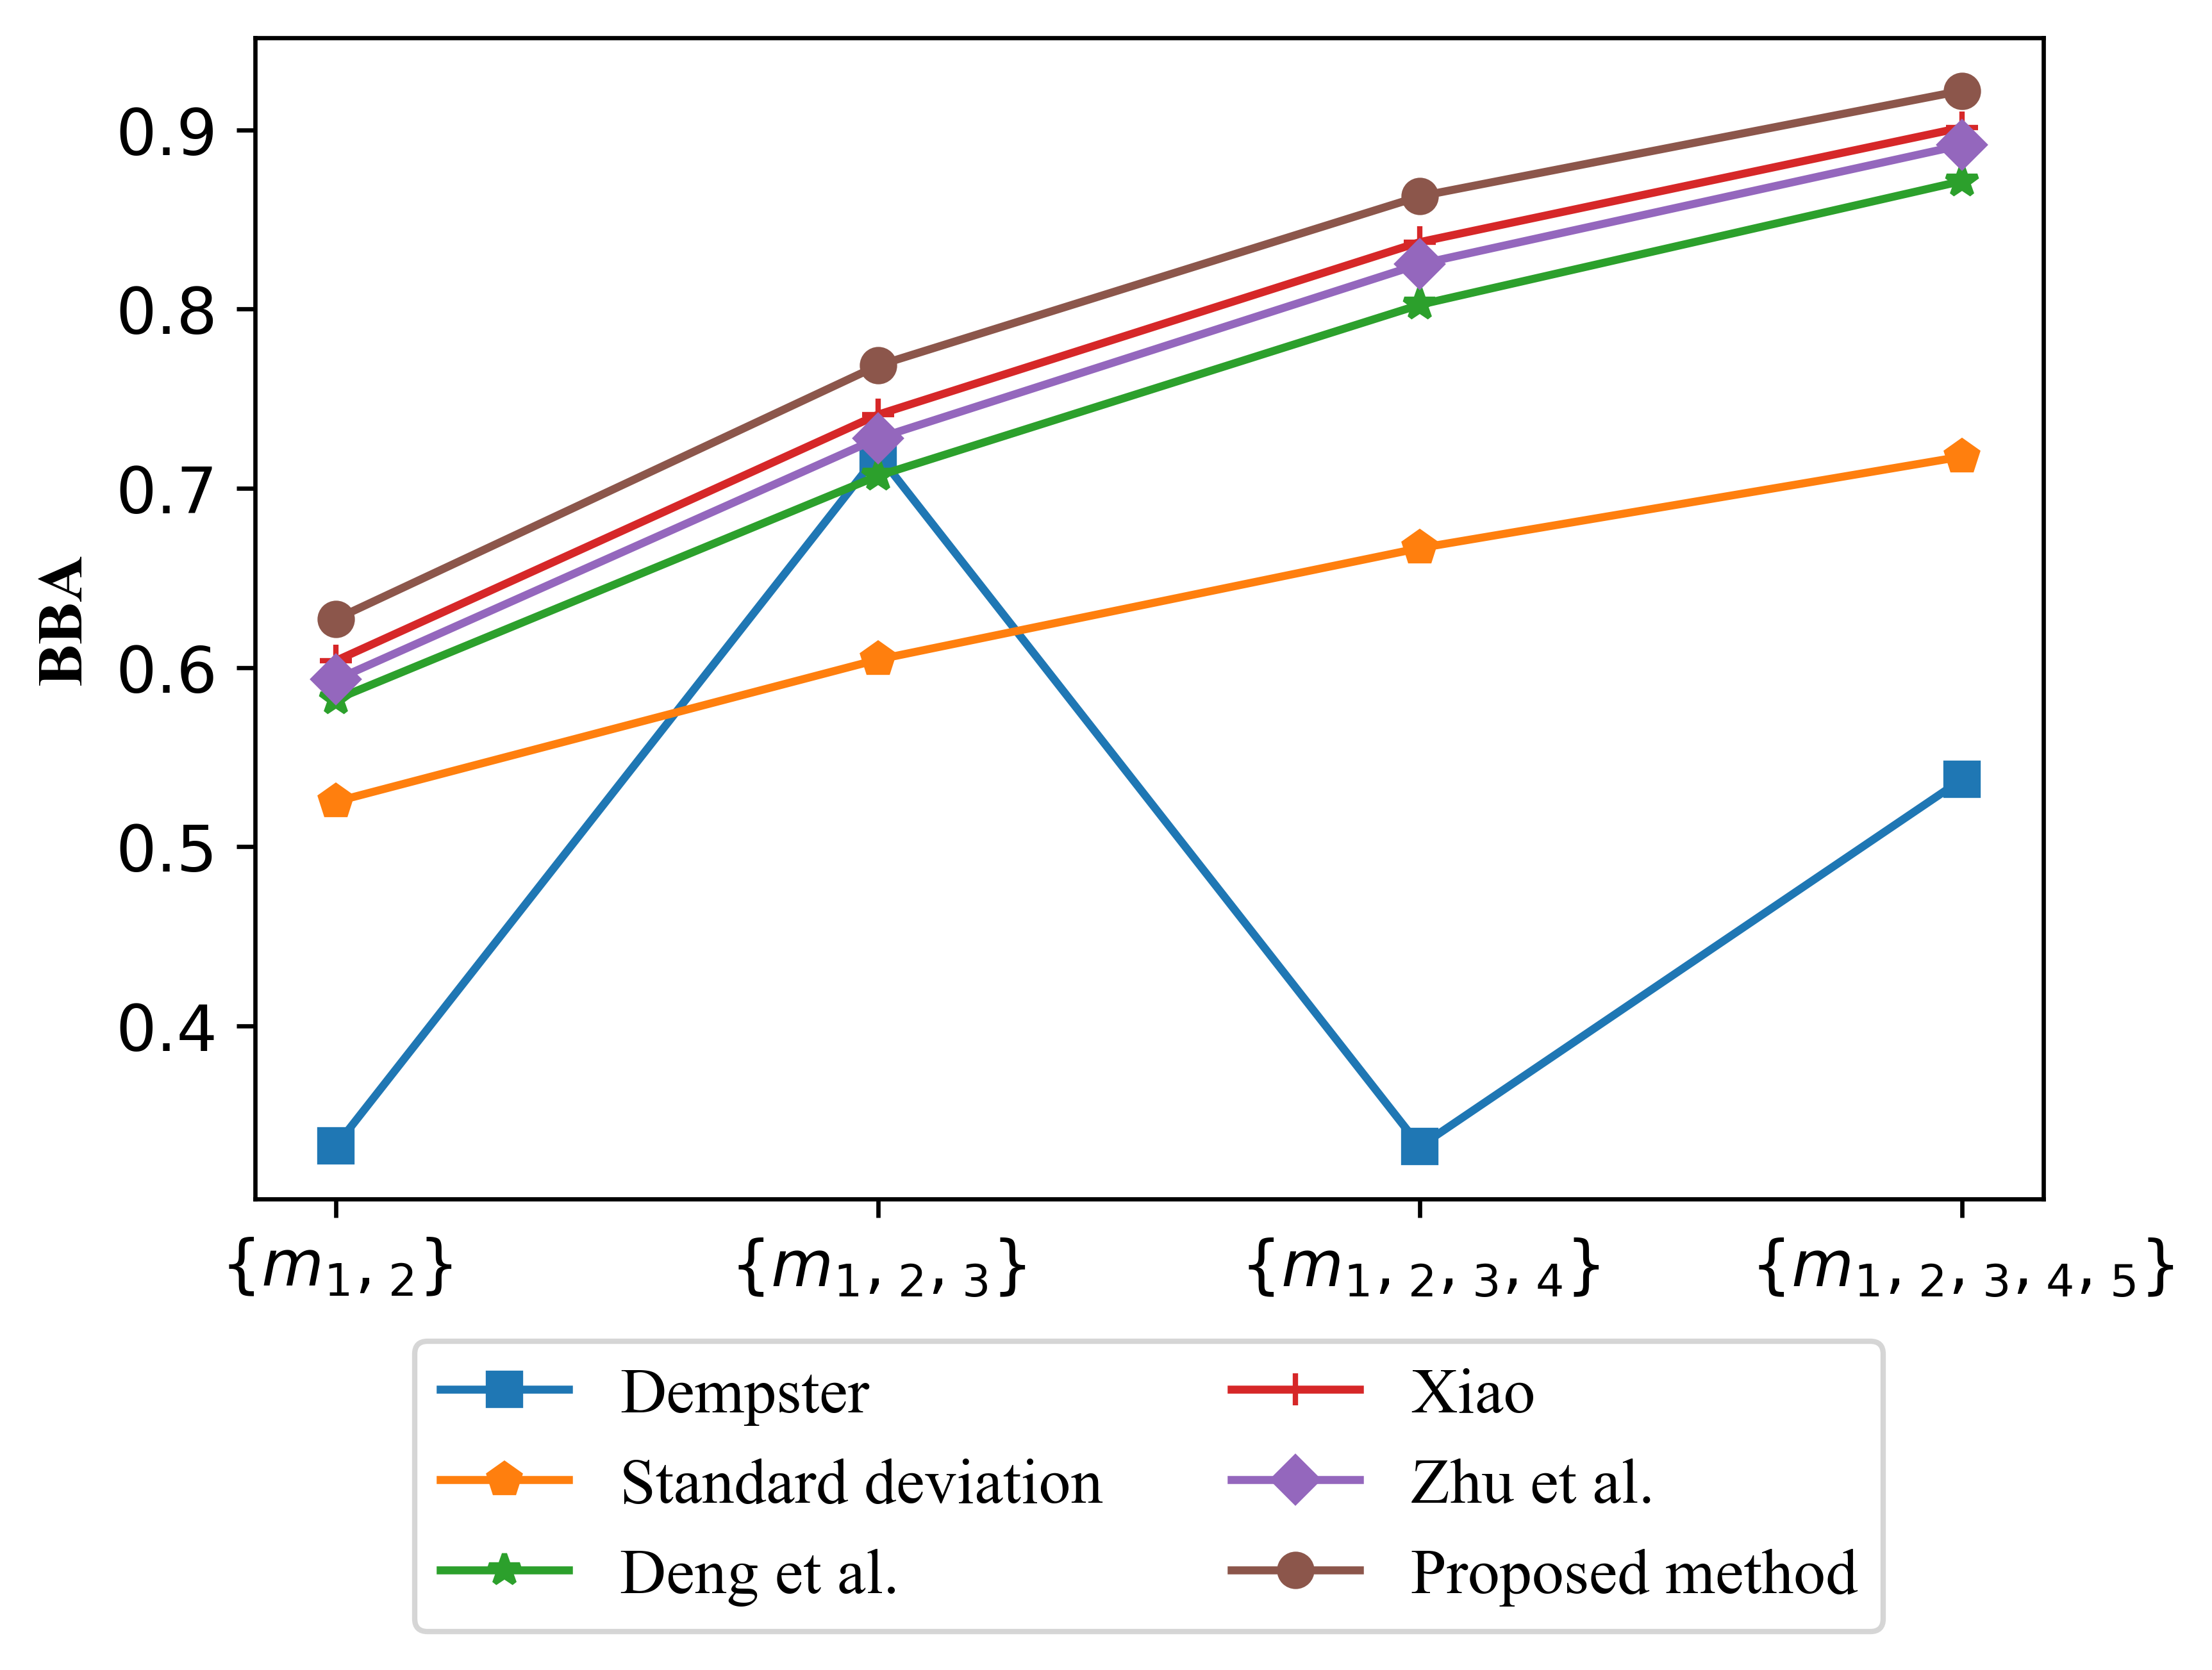

In [14]:
from matplotlib import pyplot as plt
x=np.arange(0, 4)
y1=w1[:,2]
y2=w2[:,2]
y3=w3[:,2]
y4=w4[:,2]
y5=w5[:,2]
y6=w6[:,2]
labels = ['{$m$$_1,_2$}', '{$m$$_1,_2,_3$}', '{$m$$_1,_2,_3,_4$}', '{$m$$_1,_2,_3,_4,_5$}']
plt.figure(dpi=600)
#x = np.arange(len(labels)) 
#plt.xlabel('Number of BPA')
#plt.title('(a) BBAs for target C with fusing 4 times',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
plt.ylabel('BBA',fontproperties="Times New Roman",fontsize=12,fontweight='bold')   
plt.plot(x, y1,linewidth =1.5,marker='s',color='#1f77b4',label='Dempster')
plt.plot(x, y2,linewidth =1.5,marker='p',color='#ff7f0e',label='Standard deviation')
plt.plot(x, y3,linewidth =1.5,marker='*',color='#2ca02c',label='Deng et al.')
plt.plot(x, y4,linewidth =1.5,marker='+',color='#d62728',label='Xiao')
plt.plot(x, y5,linewidth =1.5,marker='D',color='#9467bd',label='Zhu et al.')
plt.plot(x, y6,linewidth =1.5,marker='o',color='#8c564b',label='Proposed method')
#plt.plot(x, y4,linewidth =1.5,marker='D',label='Dempster')
font = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        
#         ,'color':'red'
        ,'size':12
       }
plt.yticks(fontproperties='Times New Roman', size=12)#设
plt.xticks(x, labels=labels,size=12)

plt.legend()
plt.legend(bbox_to_anchor=(0.5, -0.4),loc=8,ncol=2,prop = font)
#plt.savefig("Fig. 4(a).eps",bbox_inches = 'tight')
plt.show()